## Ga verder met het notebook van werkcollege 1

# Data collection and description

### Leerdoelen 2. data exploratie & visualisatie
- Je leert welke onderdelen in een goede Data Understanding thuis horen.
- Je gaat zelf een rapport maken waar een goede Data Understanding in zit. 
- Je kan met Pandas data inlezen en bewerken. 
- Je kan met Seaborn of matplotlib visualisaties maken van de data. 

### Achtergrondinformatie werkcollege 1:
- Google naar 
    - `pandas read csv file`
- Datacamp course `Manipulating data with Pandas`

### Achtergrondinformatie werkcollege 1:
- Google naar 
    - `pandas dataframe make histogram`
    - `pandas correlation`
    - `seaborn correlation plot`
    - `seaborn pair plot`
    - `pandas dataframe plot variables`
- Datacamp course `Introduction to Data Visualisation with Python` en eventueel `Data Visualization with Seaborn`. 

### Opdracht 
- Maak een Data Understanding hoofdstuk voor de gegeven KNMI dataset, gemodelleerd naar het voorbeeld wat je gekregen hebt. De data is een bewerkte versie van data gedownload van [deze link](http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi). 
- Leg uit (Trace&Explain) wat de code in `read_knmi_data` doet in elk van de stappen. 
- Als je een beeld van de data hebt, probeer iets te zeggen over het soort Business understanding wat je zou kunnen krijgen met deze data. 
- Data prepation, Modeling en Evaluation hoef je deze week niet aan te vullen. 

# Business understanding
Voor klimaatwetenschappers is het van groot belang om de ontwikkeling van het klimaat te volgen. Echte metingen kunnen trends laten zien, bijvoorbeeld een toename in het aantal extreme regenbuien. Een toename hiervan zou bijvoorbeeld gevolgen kunnen hebben voor de hoogte van de grote rivieren, en dus voor de benodigde hoogte van de dijken. 

De volgende dataset laat wat klimaatgegevens zien over de tijd. 

# Data Understanding
De data staat in een tekst bestand (.txt), maar na het openen van het bestand in een tekst editor is het duidelijk dat dit een csv bestand is. De functie `read_knmi_data` leest de knmi datafile in. 

## instellingen aanpassen
Als je gewend bent aan andere ontwikkelomgevingen dan heb je bijv. gemist dat de beschikbare objecten getoond worden en dat je deze automatisch kunt aanvullen. Hiervoor stellen we de completer in op 'greedy' m.b.v. zogenaamde Jupyter Notebook Magic. 

Om later ook de visualisaties in het Notebook te tonen zorgen we dat de output van het package matplotlib ook als (inline) output wordt getoond in het Notebook.

In [2]:
#handige jupyter notebook magic
%config IPCompleter.greedy = True  
%matplotlib inline
import Helper_funcs

## initial data collection

De data in het tekst-bestand is een csv-bestand. We kunnen dit direct inlezen als csv-bestand in het Notebook.

Hiervoor maken we gebruik van de read_csv methode in pandas. 
- de file moet je altijd meegeven
- de separator is ook handig om expliciet aan te geven. Doe je dit niet, dan wordt een komma gebruikt.
- In dit tekstbestand staat de toelichting op de variabelen als commentaar. Deze regels moeten worden genegeerd bij het inlezen van de gegevens. Dit doen we door dit mee te geven als argument in de methode.
- De kolomnamen staan ook als commentaar aangegeven. We hebben hier twee mogelijke werkwijzen: 1) het bronbestand aanpassen door voor deze regel het commmentaar aan te passen. Nadeel: het is dan later niet navolgbaar wat er is aangepast in de aangeleverde data. We kiezen voor 2) de gegevens inlezen zonder de header van het csv-bestand. Daarna geven we de kolommen in ons DataFrame begrijpbare namen. 

In [3]:
# Lees de data in
data_source='C:\\Users\\reube\\PycharmProjects\\DSHuiswerkOpdrachten\\data\knmi_data.txt'
columns = ['station', 'datum', 'T_gem', 'T_min', 'T_max', 'Neerslag']

In [4]:
knmi_data = Helper_funcs.read_csv(data_source,columns)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\reube\\PycharmProjects\\DSHuiswerkOpdrachten\\data\\knmi_data.txt'

## data description
**Voer alle stappen uit die nodig zijn om:** 

*Describe the data that has been acquired, including the format of the data, the quantity of data (for example, the number of records and fields in each table), the identities of the fields, and any other surface features which have been discovered. Evaluate whether the data acquired satisfies the relevant requirements.* 
(bron: CRISP-DM1.0, p.18)

**Gebruik de 3 volgende cellen als format.**

[leg uit wat je gaat bekijken en waarom]

In [1]:
#code inclusief commentaar
knmi_data.shape

NameError: name 'knmi_data' is not defined

The table has 3656 rows and 4 columns excluding the indexes

In [13]:
knmi_data.describe()

,T_gem,T_min,T_max,Neerslag
count,3656.000000,3656.000000,3656.000000,3656.000000
mean,105.027899,59.338074,148.262856,20.448578
std,61.939013,56.406605,73.191528,41.534217
min,-121.000000,-179.000000,-54.000000,-1.000000
25%,60.000000,19.000000,92.000000,0.000000
50%,103.000000,60.500000,147.000000,1.000000
75%,153.000000,103.000000,204.000000,22.000000
max,280.000000,198.000000,393.000000,556.000000


In [14]:
knmi_data.isnull().sum()

T_gem       0
T_min       0
T_max       0
Neerslag    0
dtype: int64

In [7]:
knmi_data

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01    -18    -38     11        15
        2011-02-02     29     11     40         3
        2011-02-03     52     30     80        14
        2011-02-04     90     61    109        16
        2011-02-05    114    107    120         0
...                   ...    ...    ...       ...
        2021-01-30     -4    -42     16         0
        2021-01-31    -27    -64      7         0
        2021-02-01      0     -9      9         2
        2021-02-02     22      0     77        23
        2021-02-03     81     61     95       183

[3656 rows x 4 columns]

In [35]:
knmi_data = knmi_data.iloc[[:]:[0,3]]/10

IndexingError: Too many indexers

array([<AxesSubplot: xlabel='station,datum'>], dtype=object)

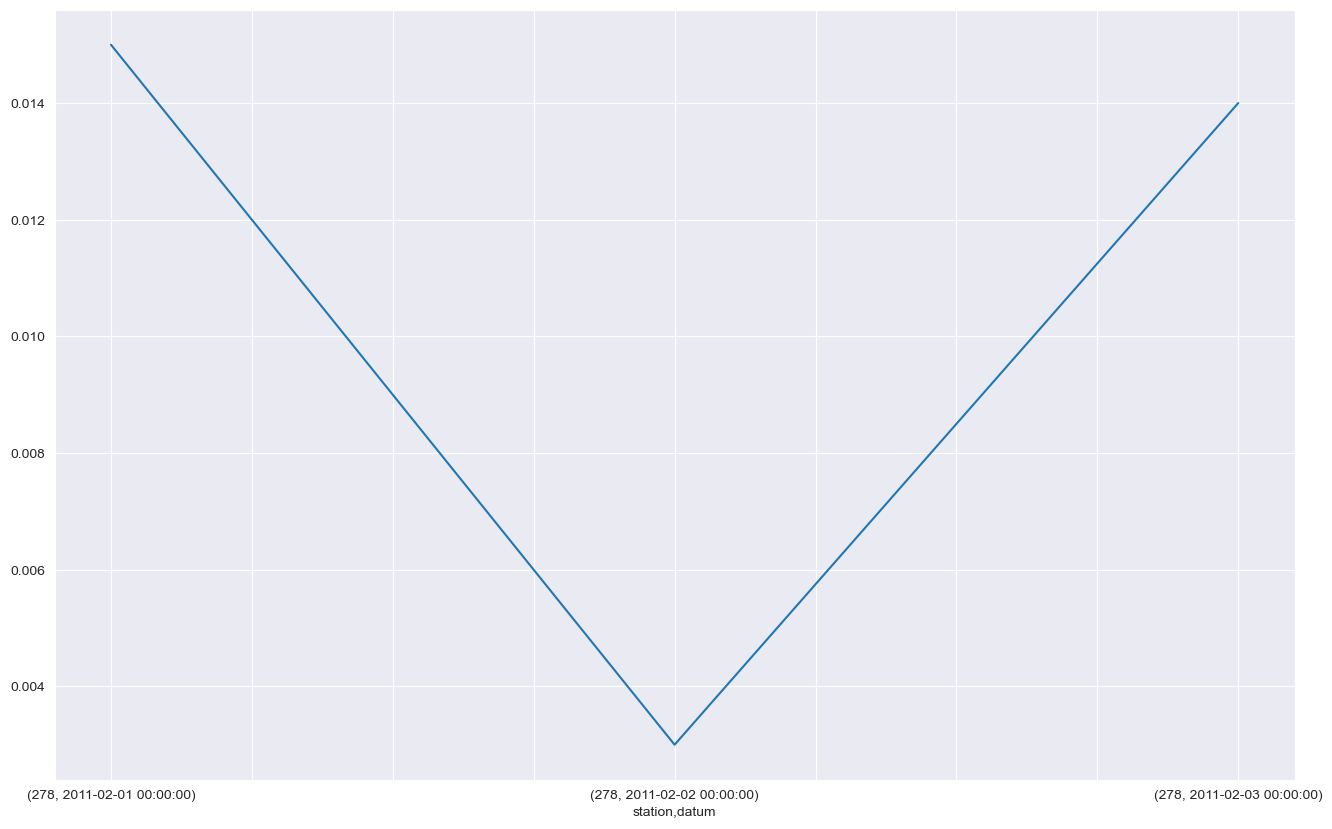

In [33]:
knmi_data.plot(figsize=(16,10),subplots=True)

the average rainfall for the period is always above 0 with an outlier of 1 data point where it drops below

<AxesSubplot: >

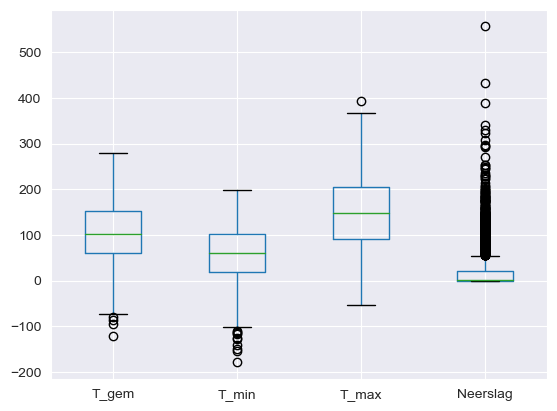

In [19]:
knmi_data.boxplot()

array([[<AxesSubplot: title={'center': 'T_gem'}>,
        <AxesSubplot: title={'center': 'T_min'}>],
       [<AxesSubplot: title={'center': 'T_max'}>,
        <AxesSubplot: title={'center': 'Neerslag'}>]], dtype=object)

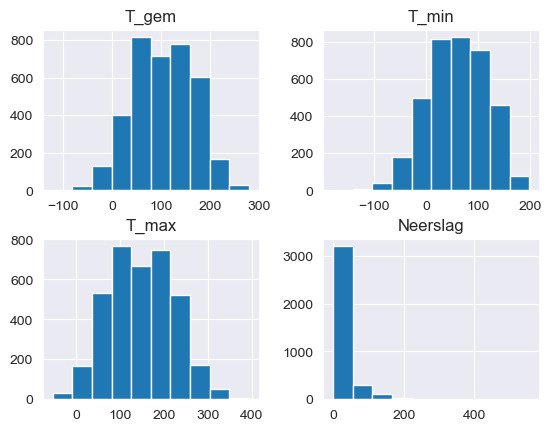

In [20]:
knmi_data.hist()

[Welke inzichten haal je uit de output na het runnen van bovenstaande codecel? Leg dit uit.]

In je toelichting beschrijf je in elk geval de variabelen in de dataset.

De variabelen beschrijven de volgende zaken:

- T_gem, gemiddelde temperatuur per dag
- T_min, de minimum temperatuur per dag
- T_max, de maximum temperatuur per dag
- Neerslag, de hoeveelheid neerslag per dag
- station, het stations id (in de index)
- datum, de datum (in de index)

[Aanvullen}

# Dataexploration

## Statistische samenvatting

*simple statistical analyses* (bron CRISP-DM, p18)

In [ ]:
#code inclusief commentaar

andere stappen uit de data exploratie: 

In [ ]:
#code inclusief commentaar

Uit de exploratie moet in elk geval komen dat de temperaturen extreem lijken/in 0,1 graden in de data zitten.

Met een meting per dag beslaat dit 9 jaar aan data:

In [ ]:
#code inclusief commentaar

## Statistische kenmerken
De volgende tabel geeft een aantal simpele statistische eigenschappen van elke variabele:

In [ ]:
#code inclusief commentaar

Wat hier opvalt 

- de temperatuur erg hoog is. Dit is omdat het in 0.1 graden opgeslagen is, bv 108 is 10,8 graden C. 
- minimum temperauur is lager dan de gemiddelde temperatuur. Dit is volslagen logisch, maar bevestigd dus wel de validiteit van onze data.  
- etc

## Grafische exploratie
In deze sectie verkennen we de data via een aantal grafieken. Het eerste deel richt zich op de individuele variabelen, het tweede op het verband tussen twee variabelen.

### Individuele variabelen
De volgende historgram laat de verdeling zien van de verschillende variabelen in de dataset:

In [ ]:
#code inclusief commentaar

Hier valt op:

- Neerslag is niet mooi normaal verdeeld, maar lijkt meer log-normaal. 
- De temperaturen zijn wel mooi normaal verdeeld. 
- De minimum temperatuur is gemiddeld het laagst, met daaropvolgend de gemiddelde en maximum temperatuur. Dit is consistent met de verwachting voor deze variabelen

### Variabelen in verband met elkaar
De variabelen laten de volgende correlatie zien:

In [ ]:
#code inclusief commentaar voor de correlatietabel

In [ ]:
#importeer het seaborn package
import seaborn

In [1]:
#code inclusief commentaar voor de grafische exploratie van de correlaties

Hieruit komt naar voren dat de temperaturen sterk aan elkaar gecorreleerd zijn. Dit is logisch: als de gemiddelde temperatuur hoog is, verwacht je ook dat de maximum en minimum temperatuur hoog zijn. 

De temperaturen en de neerslag is niet sterk aan elkaar gekoppeld. Op het eerste gezicht lijkt het dus niet zo dat het meer regent op dagen met een bepaalde temperatuur (laag of hoog). 

Het beeld van de correlatie wordt bevestigd door de set aan scatterplots:

In [ ]:
#code inclusief commentaar voor de correlatietabel

Deze plots nuanceren het beeld rondom de lage correlatie met neerslag wel: over het algemeen geen sterke correlatie, maar de sterkste neerslag vind wel plaats bij hogere temperaturen. 

Naast de correlatie is het ook goed om te kijken naar de ontwikkeling in de tijd:

In [ ]:
#code inclusief commentaar voor de visualisatie met alle histogrammen en verbanden in één overzicht

Hier is duidelijk een jaarlijkse gang in te zien: warm in de zomer en koud in de winter. Verder is de hoeveelheid neerslag hoger in de lente. Er lijkt zo om het eerste gezicht niet een sterke toename 

# Data preparation
Een aantal bewerkingsstappen komen voort uit de Data Understanding:

In [ ]:
#code inclusief commentaar 

# Modeling
Een regressie model tussen neerslag en temperatuur laat geen verband zien, en ook geen verloop in de tijd. 

# Evaluation
Op deze korte dataset van 1 station is er geen duidelijke shift te zien in patronen. Ons vermoeden is dat de huidige dataset simpelweg te beperkt is om een trend te spotten. We zullen terug naar de klant moeten om meer data te verzamelen. 
